<a href="https://colab.research.google.com/github/Lillyvettee/DataProfolio/blob/main/Lillyvette_Pecina_Axis_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: Axis Insurance

**Marks: 60**

## Define Problem Statement and Objectives

## Import all the necessary libraries

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# library for statistical tests
import scipy.stats as stats

In [8]:
sns.set() #setting the default seaborn style for our plots

## 1.	Explore the dataset and extract insights using Exploratory Data Analysis. (8 + 6 = 14 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# write the code for reading the dataset AxisInsurance.csv
df = pd.read_csv('/content/drive/MyDrive/GreatLearning/BusinessStats/Project/AxisInsurance.csv')

### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [11]:
#Displaying the first few rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.000,1,no,northeast,3167.45585
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The first few rows shows a majority of the people gender as male and the lowest bmi is 16 and the highest is 33. everyone one the first few rows arnt smokers

In [12]:
df.shape

(1338, 7)

There is 1338 rows and 7 columns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* There are total 1338 non-null observations in each of the columns.

* There are 7 columns named **'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'** whose data types are **int64, object, float64, int64, object, object, float64** respectively.

* sex, smoker and region are objects, we can change them to categories.


### Fixing the data types

In [14]:
#setting category 
df["sex"]=df["sex"].astype("category")
df["smoker"]=df["smoker"].astype("category")
df["region"]=df["region"].astype("category")

### Check for missing values

In [15]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

there is no missisng values

### Five Point Summary

In [16]:
#statistical summary 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.682687,6.145674,14.0000,26.31500,30.400,34.700000,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


the mean bmi is 30 and the mean age is 39

In [17]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

there is 676 males and 662 females


In [18]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

there is 1064 non-smokers and 274 smokers

In [19]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

in the southeast  region there is   364 people and in the 
northwest region there is 325 people while in the 
southwest region there is 325 and in the 
northeast region 324 people

### Univariate analysis

In [20]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

#### Age

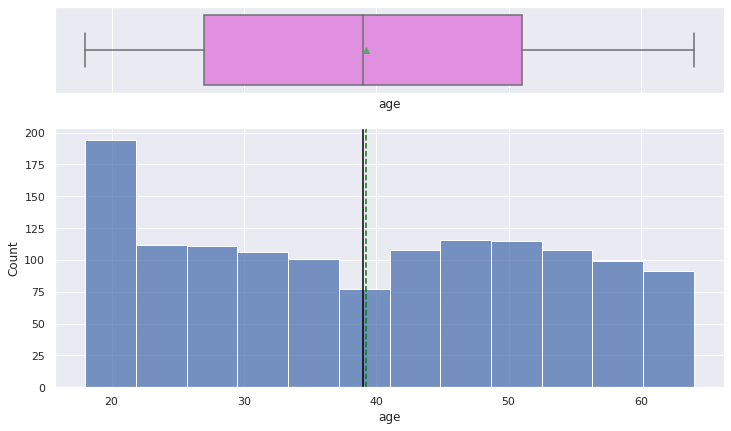

In [22]:
# plotting the distribution of 'age'
histogram_boxplot(df,'age')

The age medium is 40 and the Q1 is 15 while the Q3 iw 55

#### BMI

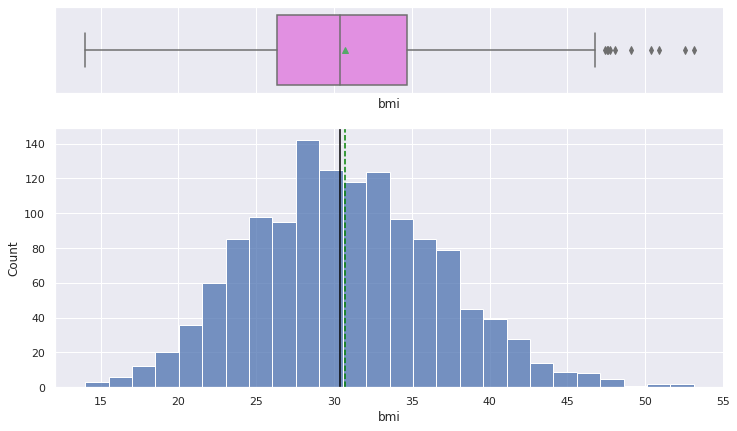

In [23]:
# plotting the distribution of 'BMI'
histogram_boxplot(df, 'bmi')

The medium is 30 and the Q1 is 28 while the Q3 is 35

#### Children

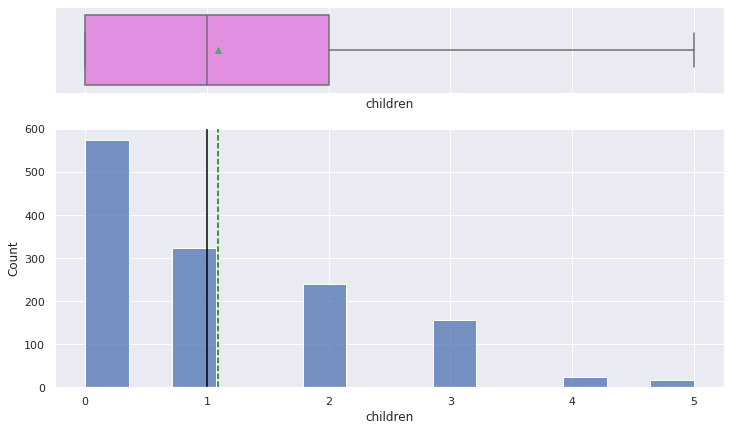

In [24]:
# plotting the distribution of 'children'
histogram_boxplot(df,'children')

The medium is 1 and the Q1 is 0 while the Q3 is 2

#### Charges

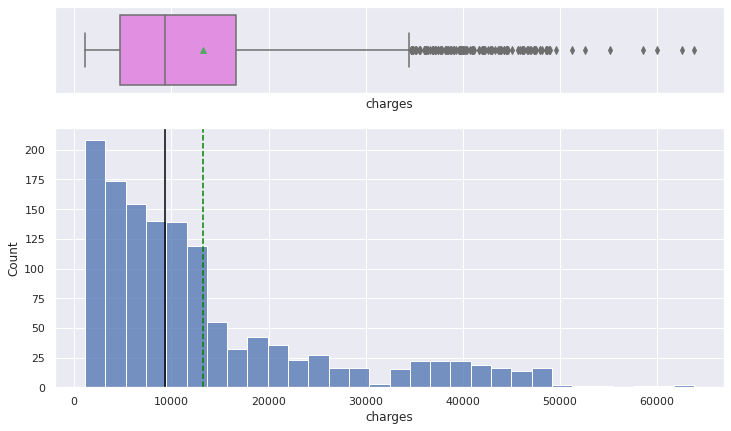

In [25]:
# plotting the distribution of 'charges'
histogram_boxplot(df,'charges')

The medium is 10000 and the Q1 is 500 while the Q3 is 10500 with outliers

#### Sex

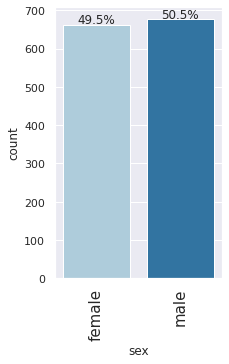

In [26]:
# plotting the barplot of 'sex'
labeled_barplot(df, 'sex', perc=True)

there is 49.5 percent of people that are females while 50.5 percent are males

#### Children

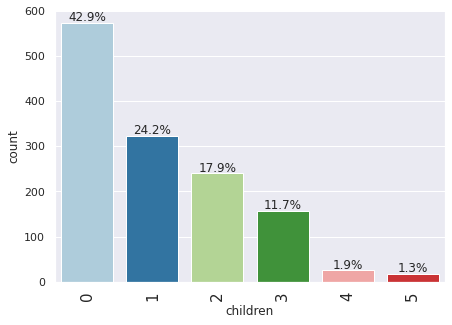

In [27]:
# plotting the barplot of 'children'
labeled_barplot(df, 'children', perc=True)

Most of the children are a few months old

#### Smoker

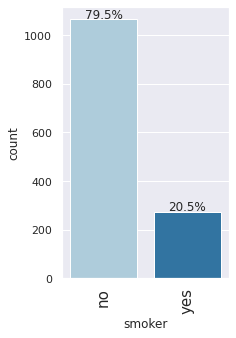

In [28]:
# plotting the barplot of 'Smoker'
labeled_barplot(df, 'smoker', perc=True)

Most of the people dont smoke

#### Region

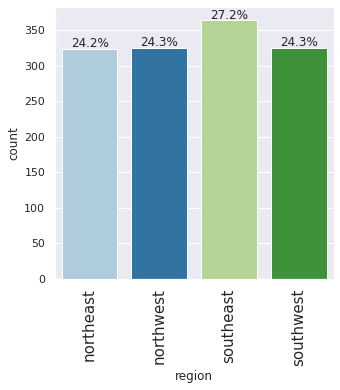

In [29]:
# plotting the barplot of 'region'
labeled_barplot(df, 'region', perc=True)

Everyone is roughly spread out in all the regions

### Bivariate Analysis

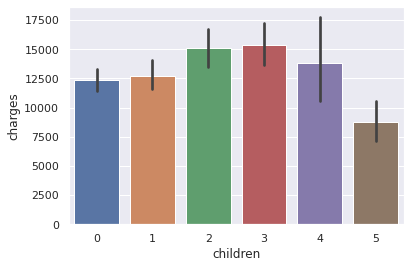

In [30]:
sns.barplot(data=df, x = "children" , y= "charges")  
plt.show()

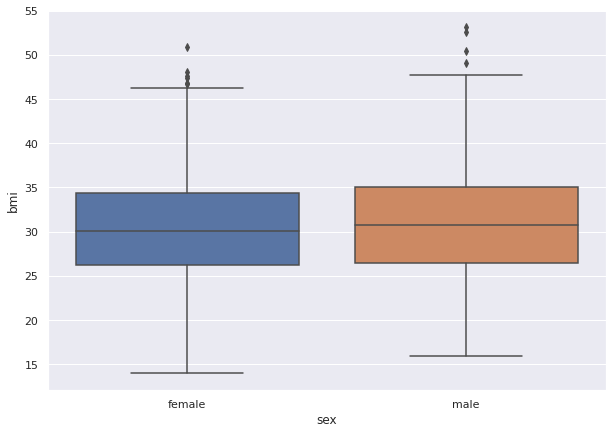

In [31]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='sex',y='bmi')
plt.show()

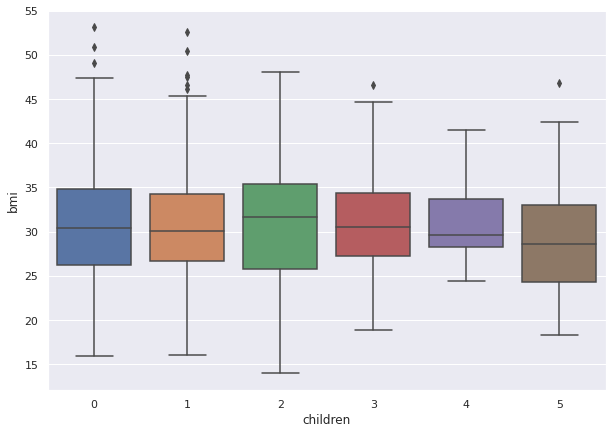

In [32]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='children',y='bmi')
plt.show()

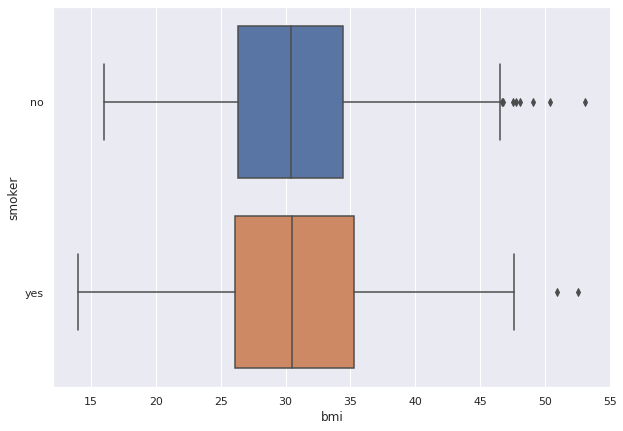

In [33]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='bmi',y='smoker')
plt.show()

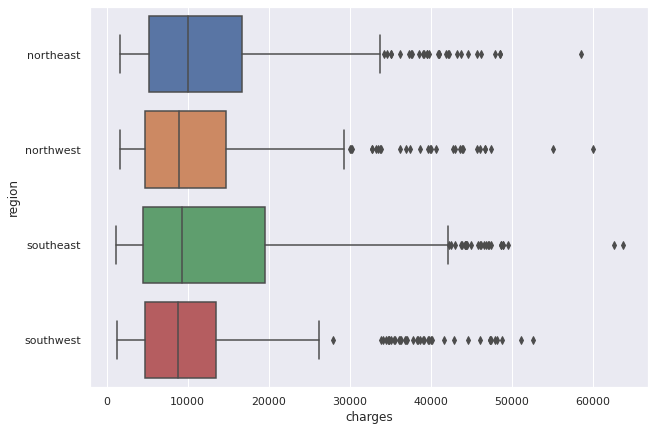

In [34]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='charges',y='region')
plt.show()

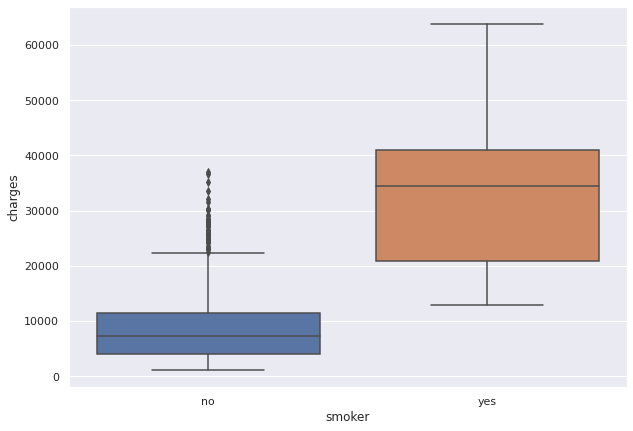

In [35]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='smoker',y='charges')
plt.show()

## 2. Prove(or disprove)  that the medical claims made by the people who smoke is greater than those who don't? 

### Perform Visual Analysis

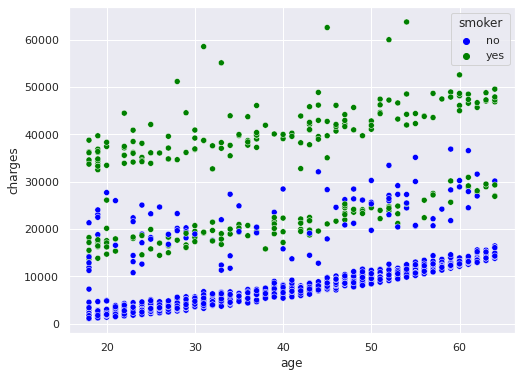

In [36]:
# Medical charges for smokers and non-smokers
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x = 'age', y = 'charges', hue='smoker',  palette= ['blue','green'] )
plt.show()

Smokers have more expensive chargers and it looks like there are evenly spread out through age group. Non smokers have charges that cost less

### Step 1: Define the null and alternate hypotheses

>Ho The mean medical claims made by members who smoke is the same as than the mean number of cliams that are made by members who dont smoke. <br>
> H0:  The mean medical claims made by smoking members is greater than to the mean claims made by members who dont smoke

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown so the appropriate test will be the two sample independent t-test


### Step 3: Decide the significance level

Significance stated by stackholders is α = 0.05.

### Step 4: Collect and prepare data

In [37]:
# extract values for smokers and non_smokers
smokers_charges = df[df['smoker'] == 'yes']['charges']
non_smokers_charges =  df[df['smoker'] == 'no']['charges']

In [38]:
print("The sample mean of the charges of smokers is:", round(smokers_charges.mean(),2))
print("The sample mean of the charges of non-smokers:", round(non_smokers_charges.mean(),2))
print('The sample standard deviation of the charges of smokers is:', round(smokers_charges.std(),2))
print('The sample standard deviation of the charges of non-smokers is:', round(non_smokers_charges.std(),2))

The sample mean of the charges of smokers is: 32050.23
The sample mean of the charges of non-smokers: 8434.27
The sample standard deviation of the charges of smokers is: 11541.55
The sample standard deviation of the charges of non-smokers is: 5993.78


As the sample standard deviations are different, the population standard deviations may be assumed to be different.

### Step 5: Calculate the p-value

In [39]:
#importing ttest_ind
from scipy.stats import ttest_ind 

#find the p-value
test_stat, p_value = ttest_ind(smokers_charges,non_smokers_charges, equal_var = False)

print('The p-value is', p_value)

The p-value is 5.88946444671698e-103


### Step 6: Compare the p-value with $\alpha$

In [40]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 5.88946444671698e-103 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean of members claims that are smokers are greater then non-smokers


## 3. Prove (or disprove) with statistical evidence that BMI of females is different from that of males.

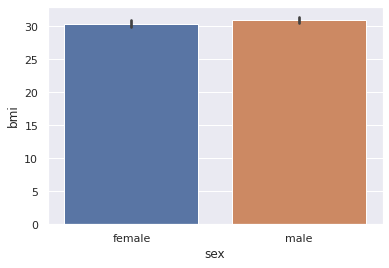

In [41]:
# visual analysis of the BMI of females vs males
sns.barplot ( data=df, x='sex', y = 'bmi')
plt.show()

By observing the above plot, we can say that overall BMI of members that are male is higher than females

### Step 1: Define the null and alternative hypotheses

> $H_0:$ The BMI rate for members who are female is the same as the BMI rate for members who are males. <br>
> $H_a:$ The BMI rate for members who are female is have a BMI that is lower than  the BMI rate for members who are male.

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. Hence, the two-sample proportion z-test will be the appropriate test for this problem.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [42]:
# number of female bmi
female_bmi = df[df.sex=='female']['bmi']
# number of male bmi
male_bmi = df[df.sex=='male']['bmi']


# number of female 
female_count = df[df.sex=='female'].value_counts().sum()
# number of male bmi
male_count = df[df.sex=='male'].value_counts().sum()
print(female_count)
print(male_count)

662
676


In [43]:
print("The sample mean of the BMI's of females is:", round(female_bmi.mean(),2))
print("The sample mean of the BMI's of males is:", round(male_bmi.mean(),2))
print("The sample standard deviation of the BMI's of females is:", round(female_bmi.std(),2))
print("The sample standard deviation of the BMI's of males is:", round(male_bmi.std(),2))

The sample mean of the BMI's of females is: 30.42
The sample mean of the BMI's of males is: 30.94
The sample standard deviation of the BMI's of females is: 6.14
The sample standard deviation of the BMI's of males is: 6.14


### Step 5: Calculate the p-value

In [44]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([30,39], [female_count,male_count],alternative="larger")
print('The p-value is', p_value)

The p-value is 0.8469283117581257


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Step 6: Compare the p-value with $\alpha$

In [45]:
# conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.8469283117581257 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

the p value is greater than the level of significance, we fail to reject the null hypothesis. The BMI rate for members who are female is the same as the BMI rate for members who are males.

## 4. Does the smoking habit of customers depend on their region?


### Perform Visual Analysis

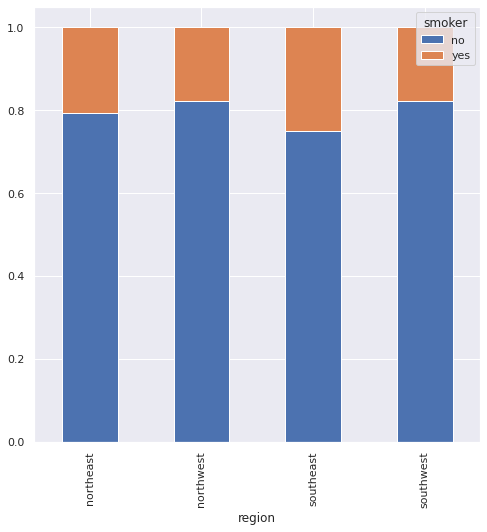

In [46]:
pd.crosstab(df['region'],df['smoker'],normalize='index').plot(kind="bar", figsize=(8,8), stacked=True) 
plt.show()

The distribution members who smoke is not uniformly distributed. 

### Step 1: Define the null and alternate hypotheses

> $H_0:$ The members who smoke  are the same no matter what their region is <br>
$H_a:$ The members who smoke  depends on their region

### Step 2: Select Appropriate test


This is a problem of Chi-square test of independence, concerning the two independent categorical variables, - smoker and region.

### Step 3: Decide the significance level


As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data


In [47]:
# the table showing the distribution of two categorical variables
contingency_table = pd.crosstab(df['smoker'], df['region'])
contingency_table

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


### Step 5: Calculate the p-value


In [48]:
#import the required function
from scipy.stats import chi2_contingency
# find the p-value
chi_2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
#  p-value
print('The p-value is', p_value)

The p-value is 0.06171954839170547


### Step 6: Compare the p-value with α

In [49]:
# conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.06171954839170547 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that their smoking habits depends on their region

## 5.	Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.

### Perform Visual Analysis

In [50]:
# create a new DataFrame for customers who are female and have 0,1, or 2 children
new_df = df[(df['sex']=='female') & (df['children']<3)]


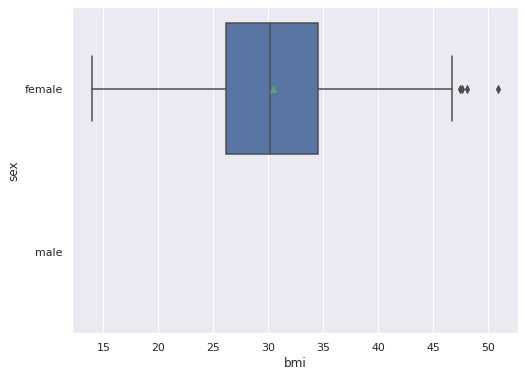

In [51]:

plt.figure(figsize=(8,6))

sns.boxplot( x = "bmi" ,y= "sex" ,showmeans = True, data = new_df) 
plt.show()

In [52]:
# calculate the mean BMI of women with 0, 1, and 2 children
new_df.groupby(['children'])['bmi'].mean()

children
0    30.485502
1    30.047500
2    30.572437
Name: bmi, dtype: float64

### Step 1: Define the null and alternate hypotheses

> $H_0:$ The mean BMIs of women with no children, one child, and two are the same.. <br>
$H_a:$ At least one of the mean BMIs of women with no children, one child, and two is different

### Step 2: Select Appropriate test

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

### Shapiro-Wilk’s test


>$H_0:$ BMI of women follows a normal distribution

against the alternative hypothesis

>$H_a:$ BMI of women does not follow a normal distribution

In [53]:
#p-value
w, p_value = stats.shapiro(new_df['bmi'])
print('The p-value is', p_value)

The p-value is 0.20654043555259705


Since p-value of the test is very larger than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

>$H_0$: All the population variances are equal


>$H_a$: At least one variance is different from the rest

In [54]:
#p-value
statistic, p_value = stats.levene(new_df[new_df['children']==0]['bmi'], 
                             new_df[new_df['children']==1]['bmi'], 
                             new_df[new_df['children']==2]['bmi'])

print('The p-value is', p_value)

The p-value is 0.33762398820932993


The p-value is larger than the 5% significance level, we fail to reject the null hypothesis 

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

In [55]:
#  BMI of women with 0 children 
bmi_women_zero_child = new_df[new_df['children']==0]['bmi']
# BMI of women with 1 children 
bmi_women_one_child =  bmi_women_zero = new_df[new_df['children']==1]['bmi']
#  BMI of women with 2 children 
bmi_women_two_child = bmi_women_zero = new_df[new_df['children']==2]['bmi']

### Step 5: Calculate the p-value

In [56]:
from scipy.stats import f_oneway 

# calculate the p-value
test_stat, p_value =   f_oneway(bmi_women_zero_child, bmi_women_one_child, bmi_women_two_child)  

print('The p-value is', p_value)

The p-value is 0.7200129592186635


### Step 6: Compare the p-value with $\alpha$

In [57]:
#conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.7200129592186635 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the mean BMI of women with zero, one or two children are the same

## Conclusion and Business Recommendations

* Members claims that are smokers are greater then non-smokers

----- This means that since smokers will have higher chances of claims than there should be a fee for smokers who are under the insurance policy

*  The BMI rate for members who are female is the same as the BMI rate for members who are males.
*  smoking habits are independant of their region

--- It doesnt matter where someone lives they're region does not affect their smoking habits

* The BMI of women dependants on how many children they have

----- this means there should offer news letter or any kind of information to women with children on how to lower their BMI or even create a rewards program to motivate women to lower there bmi
